In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib
import lightgbm as lgb

C:\Users\hp\Anaconda3\lib\site-packages\distributed\utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  % (host, default, e), RuntimeWarning)


In [134]:
train = pd.read_csv('Train.csv', parse_dates=['Date'])
test = pd.read_csv('Test.csv', parse_dates=['Date'])
submissions = pd.read_csv('SampleSubmission.csv')

In [98]:
print(train.shape)
print(test.shape)

(30557, 82)
(16136, 77)


In [135]:
traincols = list(train.columns)
testcols = list(test.columns)
#print(traincols)
#print(testcols)

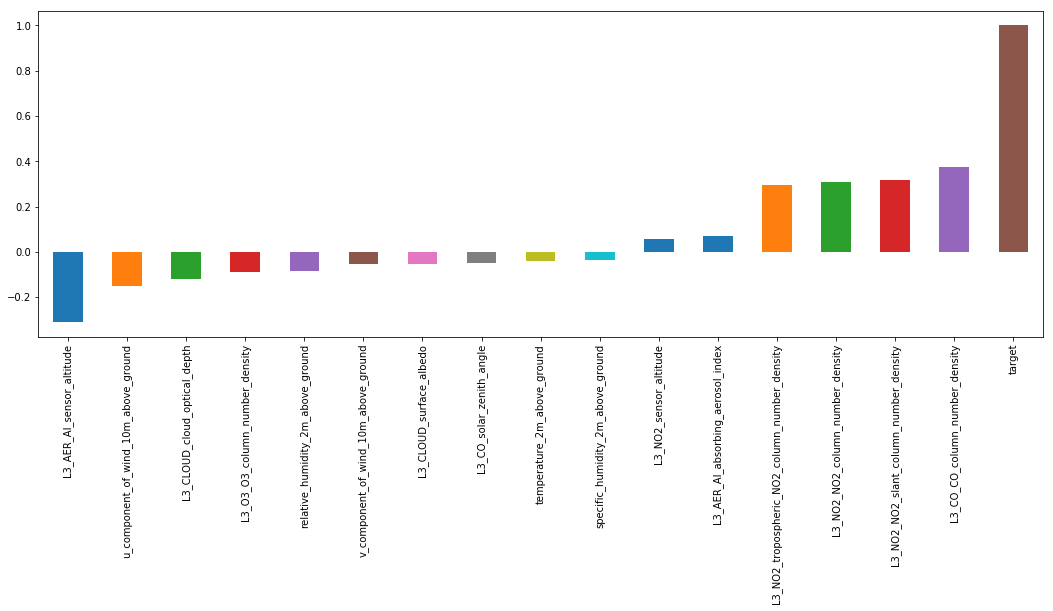

In [24]:
# Look at correlation with target
train.corr()['target'].sort_values().plot(kind='bar', figsize=(18, 6))

In [ ]:
# Look at correlation with target
corr = dict(train.corr()['target'].sort_values())

In [136]:
Labels = np.array(train['target'])
print(Labels)
#train = train.drop(['target'], axis=1)

[ 38.  39.  24. ...  85. 103.  89.]


In [101]:
extracted_columns = ['relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
                     'u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground', 'L3_NO2_NO2_column_number_density',
                     'L3_NO2_NO2_slant_column_number_density', 'L3_NO2_sensor_altitude', 'L3_NO2_tropospheric_NO2_column_number_density',
                     'L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density', 'L3_CO_solar_zenith_angle', 
                    'L3_CLOUD_cloud_optical_depth', 'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index', 'L3_AER_AI_sensor_altitude',
                     'Date', 'Place_ID']

In [102]:
for i in testcols:
    if i not in extracted_columns:
        test = test.drop(i, axis=1)
for j in traincols:
    if j not in extracted_columns:
        train = train.drop(j, axis=1)

In [163]:
print(train.shape)
print(test.shape)

(16136, 77)
(16136, 77)


In [104]:
from sklearn.preprocessing import Imputer


In [57]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.5)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=600, max_depth=16, max_features='auto',
                            min_samples_leaf=1, min_samples_split=2, random_state=0)


lg = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.1, n_estimators=2000, max_depth=14)
eval_set = [(x_test, y_test)]


xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 2000, seed = 123, max_depth = 16,
                           learning_rate=0.01, booster = 'dart', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)
eval_set = [(x_test, y_test)]

In [138]:
train['month'] = train.Date.dt.month
train['day'] = train.Date.dt.day

test['month'] = test.Date.dt.month
test['day'] = test.Date.dt.day

In [155]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['Place_ID'] = le.fit_transform(test['Place_ID'])

In [142]:
train = test.fillna(value=-999)
train.isna().sum()

#preds1 = rf.predict(x_test)
#preds2 = lg.predict(x_test)

Place_ID X Date                                   0
Date                                              0
Place_ID                                          0
precipitable_water_entire_atmosphere              0
relative_humidity_2m_above_ground                 0
specific_humidity_2m_above_ground                 0
temperature_2m_above_ground                       0
u_component_of_wind_10m_above_ground              0
v_component_of_wind_10m_above_ground              0
L3_NO2_NO2_column_number_density                  0
L3_NO2_NO2_slant_column_number_density            0
L3_NO2_absorbing_aerosol_index                    0
L3_NO2_cloud_fraction                             0
L3_NO2_sensor_altitude                            0
L3_NO2_sensor_azimuth_angle                       0
L3_NO2_sensor_zenith_angle                        0
L3_NO2_solar_azimuth_angle                        0
L3_NO2_solar_zenith_angle                         0
L3_NO2_stratospheric_NO2_column_number_density    0
L3_NO2_tropo

In [162]:
Features = np.array(train)
test_enc = np.array(test)

import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [164]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=600, max_depth=16, max_features='auto',
                            min_samples_leaf=1, min_samples_split=2, random_state=0)

rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [161]:
train = train.drop(['Place_ID X Date'], axis=1)
test = test.drop(['Place_ID X Date'], axis=1)
#rf.fit(x_train, y_train)

#train = train.drop(['target', 'target_min', 'target_max', 'target_variance', 'target_count'], axis=1)
#test = test.drop('Date', axis=1)

In [ ]:
#xg_reg.fit(x_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 200)

In [130]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [165]:
predictions = rf.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions) ** 0.5

31.016211903675494

In [166]:
preds = rf.predict(test_enc)
submissions.target = preds
submissions.to_csv('RFFFFFF.csv', index=False)

In [160]:
train.head()

,Place_ID X Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,...,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,month,day
0,0OS9LVX X 2020-01-02,0,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,...,22.942019,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.000000,-999.000000,1,2
1,0OS9LVX X 2020-01-03,0,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,...,18.539116,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.000000,-999.000000,1,3
2,0OS9LVX X 2020-01-04,0,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,...,14.140820,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.000000,-999.000000,1,4
3,0OS9LVX X 2020-01-05,0,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,0.000155,...,32.730553,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.000000,-999.000000,1,5
4,0OS9LVX X 2020-01-06,0,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,0.000131,...,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789,1,6


In [73]:
lr.fit(stacked_predicitions, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
meta_preds = lr.predict(stacked_test_predictions)

In [75]:
meta_preds.shape

(16136,)

In [84]:
submissions.target = meta_preds
submissions.to_csv('metaprediction.csv', index=False)

In [81]:
rf1 = RandomForestRegressor(n_estimators=400, max_features='auto',
                            min_samples_leaf=1, min_samples_split=2, random_state=0)

In [82]:
rf1.fit(stacked_predicitions, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [83]:
meta_preds = rf1.predict(stacked_test_predictions)